In [1]:
import math as m

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import special
from pylab import *
%matplotlib inline

from src import billiard_halfClass as bc
from src import wavefunctions as wf
from src import curveClass as cv
from src import spectrumUtilities as su
#from src import verginiSaraceno as vs
#from src import planeWaveDecomposition as pwd

In [2]:
def Robnik_r(t, lam = 0):
    phi = t * np.pi
    x = np.cos(phi) * (1 + 2*lam * np.cos(phi))
    y = np.sin(phi) * (1 + 2*lam * np.cos(phi))
    return x, y

def Robnik_n(t, lam = 0):
    phi = t * np.pi
    #tangent
    tx = -np.sin(phi) - 2*lam*np.sin(2*phi)
    ty = np.cos(phi) + 2*lam*np.cos(2*phi)
    norm = np.sqrt(tx**2+ty**2)
    return ty/norm, -tx/norm

def Robnik_arc(t, lam = 0):
    phi = t * np.pi
    a = lam * 2
    return 2*(1+a)*special.ellipeinc(phi/2,4*a/(1+a)**2 )

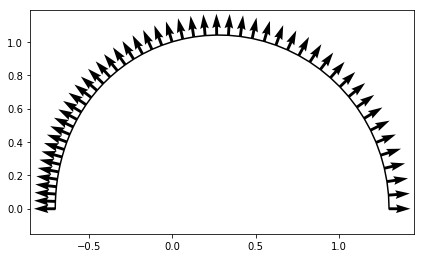

In [3]:
lam = 0.15
params_1 = {"lam" : lam}
area = 0.5 * (1 + 2 * lam * lam) * m.pi
Robnik = cv.curve(Robnik_r, Robnik_n, Robnik_arc, **params_1)
curves = [Robnik]
dens = [10 for i in curves]
RobnikBilliard = bc.billiard_half(curves, area, point_densities= dens)
RobnikBilliard.plot_boundary(M =5)

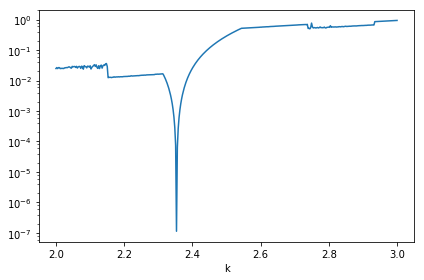

In [16]:
k1 = 2.0
k2 = 3.0
sym = 0
RobnikBilliard.plot_tension( k1, k2, sym, N = 200, grid = 400)

In [17]:
k0 = 2.35
dk = 0.05
N = 200
PWDresult = RobnikBilliard.PWD_eigenvalue(N, k0, dk, sym)
print(PWDresult)

     fun: 7.7231988360627869e-11
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 2.3534832362305473


In [4]:
k0 = 2.35
dk = 0.05
N = 200
sym = 0
VSresult = RobnikBilliard.scaling_eigenvalues(N, k0, dk, sym)
print(VSresult)

[ 2.35348203]


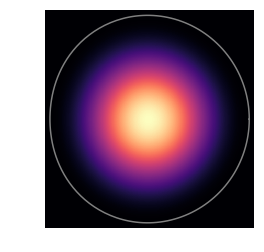

In [5]:
RobnikBilliard.plot_probability( VSresult[0], sym, grid = 400, cmap = "magma", plot_full=True)

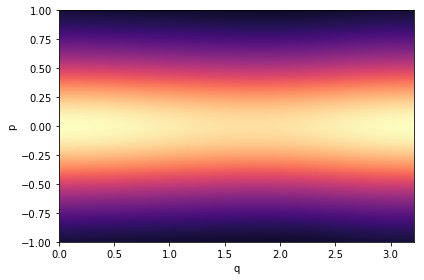

In [21]:
RobnikBilliard.plot_Husimi_function( VSresult[0], sym)

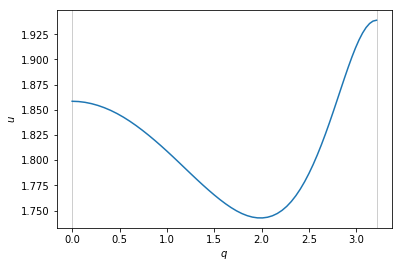

In [13]:
RobnikBilliard.plot_boundary_function(PWDresult.x, sym, delta = 5, plot_curve_bounds = True)

In [6]:
def computeSpectrum(self, sym, k0, dk, n):
    VSMIN = 100 
    N = max(3 * m.ceil((k0+n*dk)/ 4), VSMIN)
    spek_fun = lambda x : self.scaling_eigenvalues(N, x, dk, sym)
    return  su.computeSpectrum(k0, dk, n, spek_fun)

In [7]:
sym = 0
k0 = 150
dk = 0.1
n = 20
spectrum = computeSpectrum(RobnikBilliard, sym, k0, dk, n)
spectrum

array([ 150.00927518,  150.02754873,  150.03563592,  150.07251466,
        150.08162494,  150.09485686,  150.12653186,  150.14108399,
        150.19424733,  150.20936908,  150.27535514,  150.30264876,
        150.31218952,  150.33920139,  150.39146568])

In [8]:
import matplotlib.gridspec as gridspec

150.009275178
150.027548735
150.035635921
150.072514661
150.08162494
150.094856861
150.126531864
150.141083989
150.194247333
150.209369079
150.275355141
150.302648763


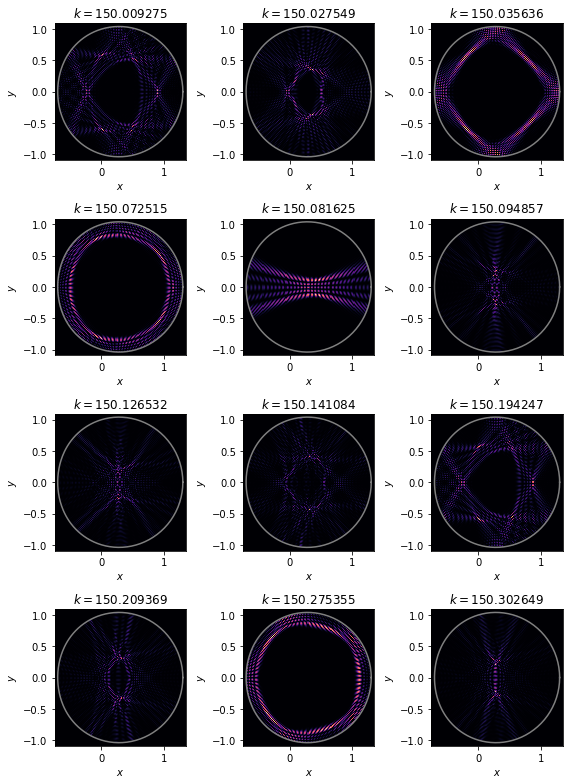

In [11]:
fig = plt.figure(figsize = (8,11))
j = 1
for k in spectrum[:12]:
    subplot(4,3,j,adjustable='box')
    print(k)
    j = j+1
    RobnikBilliard.plot_probability(k, sym, plot_full=True, plot_axis=True)    
    plt.title(r"$k = %f$" %k)
plt.tight_layout()